In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split

In [4]:
# load the iris dataset from sklearn
iris = load_iris()

# convert the dataset into a dataframe
data = pd.DataFrame(iris.data, columns = iris.feature_names)
data['label'] = iris.target
data.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'label']

print(data)

     sepal length  sepal width  petal length  petal width  label
0             5.1          3.5           1.4          0.2      0
1             4.9          3.0           1.4          0.2      0
2             4.7          3.2           1.3          0.2      0
3             4.6          3.1           1.5          0.2      0
4             5.0          3.6           1.4          0.2      0
..            ...          ...           ...          ...    ...
145           6.7          3.0           5.2          2.3      2
146           6.3          2.5           5.0          1.9      2
147           6.5          3.0           5.2          2.0      2
148           6.2          3.4           5.4          2.3      2
149           5.9          3.0           5.1          1.8      2

[150 rows x 5 columns]


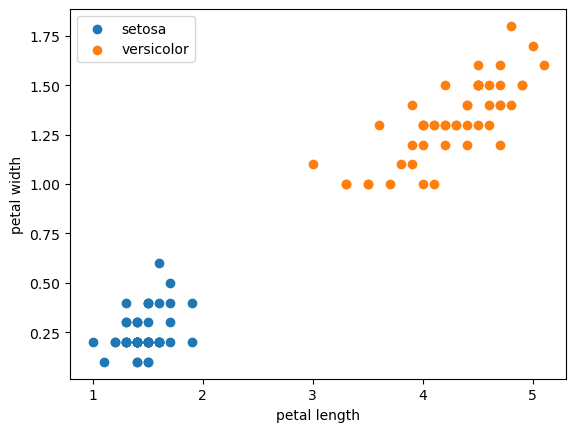

In [5]:
# visualize the dataset through a scatter plot
plt.scatter(data[:50]['petal length'], data[:50]['petal width'], label = 'setosa')
plt.scatter(data[50:100]['petal length'], data[50:100]['petal width'], label = 'versicolor')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend()
plt.show()

In [6]:
# fetch features that we need and labels from dataset
data = np.array(data.iloc[:100, [2, 3, -1]])

# divide the dataset into features and labels
X = data[:, :-1]
Y = data[:, -1]

# make two labels be of different symbols
for i in range(len(Y)):
    if Y[i] == 0:
        Y[i] = -1

# call built-in methods of sklearn to partition the dataset into train set and test set randomly
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1)

In [13]:
model = Perceptron(fit_intercept = True, max_iter = 1000, shuffle = False, eta0 = 0.01, tol = None)

# train the model
model.fit(X_train, Y_train)

# print the final parameter we got
print("w: ", model.coef_)
print("b: ", model.intercept_)
print("iteration times: ", model.n_iter_)

# evaluate the model with test set
print(model.score(X_test, Y_test))

w:  [[0.013 0.013]]
b:  [-0.05]
iteration times:  1000
1.0


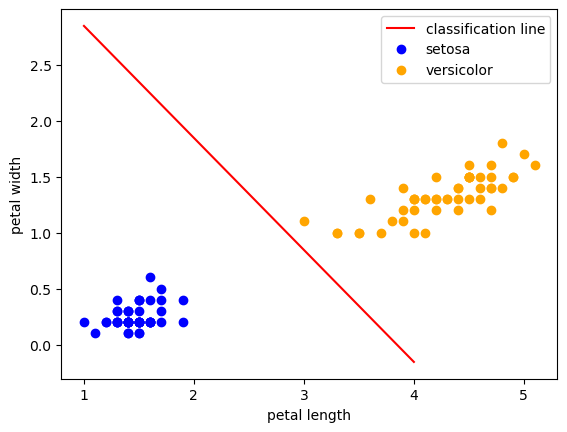

In [14]:
# visualize the result line
xs = np.arange(1, 5)
ys = -(model.coef_[0][0] * xs + model.intercept_) / model.coef_[0][1]
plt.plot(xs, ys, 'r', label = 'classification line')

plt.plot(data[:50, 0], data[:50, 1], 'o', color = 'blue', label = 'setosa')
plt.plot(data[50:100, 0], data[50:100, 1], 'o', color = 'orange', label = 'versicolor')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend()
plt.show()